In [77]:
# Data Sciences Project
# Predicting Pollster Rating Accuracy Using Pollster Data
# Sadeem Bin Mahfouz - Reem Bazarah - Leen Bajunaid

# 1.Loading and Preprocessing the Data

In [2]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# Load the dataset 
poll = pd.read_csv('pollster-ratings.csv')

# Display the first few rows of the dataset to understand its structure, this will help identify column names, data types, and get a sense of the data
poll.head()

,Rank,Pollster,Pollster Rating ID,Polls Analyzed,NCPP/AAPOR/Roper,Banned by 538,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty
0,1,Selzer & Co.,304,50,1,0,-1.164872,A+,0.106846,0.780000,...,4.562133,5.959977,-1.392989,-1.623991,-1.006764,33,0.201305,-0.243631,5.339089,0.000000
1,2,ABC News/The Washington Post,3,82,1,0,-0.991960,A+,0.919807,0.737805,...,3.053507,4.972745,-1.914383,-1.328717,-0.980676,77,1.256719,1.231279,3.827492,0.132349
2,3,Siena College/The New York Times Upshot,448,83,1,0,-0.954452,A+,1.142941,0.728916,...,4.352682,5.364920,-1.007384,-1.309741,-1.055391,82,1.422586,0.231204,3.574594,0.225522
3,4,IBD/TIPP,144,31,1,0,-0.938424,A+,-0.832351,0.806452,...,2.085002,4.009343,-1.919487,-1.512109,-0.792614,31,-1.587916,-1.814818,3.704195,0.099455
4,5,Field Research Corp. (Field Poll),94,25,1,0,-0.906695,A/B,-0.682868,1.000000,...,4.103997,5.990497,-1.881646,-2.473643,-0.923134,18,-2.455076,0.725441,4.752571,0.000000


In [5]:
# Check the number of rows in your dataset
print(poll.shape[0])  # Returns the number of observations.

505


In [6]:
# Check the number of columns in your dataset
print(poll.shape[1])  # Returns the number of columns.

21


In [7]:
# Check for missing values in each column.
print(poll.isnull().sum())  # Returns the number of missing values per column.

Rank                                              0
Pollster                                          0
Pollster Rating ID                                0
Polls Analyzed                                    0
NCPP/AAPOR/Roper                                  0
Banned by 538                                     0
Predictive Plus-Minus                             0
538 Grade                                         0
Mean-Reverted Bias                               44
Races Called Correctly                            0
Misses Outside MOE                                0
Simple Average Error                              0
Simple Expected Error                             0
Simple Plus-Minus                                 0
Advanced Plus-Minus                               0
Mean-Reverted Advanced Plus Minus                 0
# of Polls for Bias Analysis                      0
Bias                                             44
House Effect                                     62
Average Dist

In [8]:
# Check the data types of each column
print(poll.dtypes)

Rank                                              int64
Pollster                                         object
Pollster Rating ID                                int64
Polls Analyzed                                    int64
NCPP/AAPOR/Roper                                  int64
Banned by 538                                     int64
Predictive Plus-Minus                           float64
538 Grade                                        object
Mean-Reverted Bias                              float64
Races Called Correctly                          float64
Misses Outside MOE                              float64
Simple Average Error                            float64
Simple Expected Error                           float64
Simple Plus-Minus                               float64
Advanced Plus-Minus                             float64
Mean-Reverted Advanced Plus Minus               float64
# of Polls for Bias Analysis                      int64
Bias                                            

In [9]:
# Check the columns to understand the structure of the dataset
print(poll.columns)

Index(['Rank', 'Pollster', 'Pollster Rating ID', 'Polls Analyzed',
       'NCPP/AAPOR/Roper', 'Banned by 538', 'Predictive Plus-Minus',
       '538 Grade', 'Mean-Reverted Bias', 'Races Called Correctly',
       'Misses Outside MOE', 'Simple Average Error', 'Simple Expected Error',
       'Simple Plus-Minus', 'Advanced Plus-Minus',
       'Mean-Reverted Advanced Plus Minus', '# of Polls for Bias Analysis',
       'Bias', 'House Effect', 'Average Distance from Polling Average (ADPA)',
       'Herding Penalty'],
      dtype='object')


In [10]:
# Check basic information about the dataset (columns, missing values, data types)
print(poll.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Rank                                          505 non-null    int64  
 1   Pollster                                      505 non-null    object 
 2   Pollster Rating ID                            505 non-null    int64  
 3   Polls Analyzed                                505 non-null    int64  
 4   NCPP/AAPOR/Roper                              505 non-null    int64  
 5   Banned by 538                                 505 non-null    int64  
 6   Predictive Plus-Minus                         505 non-null    float64
 7   538 Grade                                     505 non-null    object 
 8   Mean-Reverted Bias                            461 non-null    float64
 9   Races Called Correctly                        505 non-null    flo

In [11]:
print('Max Simple Average Error:', poll['Simple Average Error'].max())
print('Min Simple Average Error:', poll['Simple Average Error'].min())

Max Simple Average Error: 37.61340332
Min Simple Average Error: 0.053726196


# 2.Handle missing values by dropping rows with missing data

In [12]:
# Dropping rows for simplicity, but also we could fill missing values using the mean or mode
poll = poll.dropna() 
poll.isnull().sum()

Rank                                            0
Pollster                                        0
Pollster Rating ID                              0
Polls Analyzed                                  0
NCPP/AAPOR/Roper                                0
Banned by 538                                   0
Predictive Plus-Minus                           0
538 Grade                                       0
Mean-Reverted Bias                              0
Races Called Correctly                          0
Misses Outside MOE                              0
Simple Average Error                            0
Simple Expected Error                           0
Simple Plus-Minus                               0
Advanced Plus-Minus                             0
Mean-Reverted Advanced Plus Minus               0
# of Polls for Bias Analysis                    0
Bias                                            0
House Effect                                    0
Average Distance from Polling Average (ADPA)    0


In [13]:
# Drop the numeric index column 0
poll = poll.drop(poll.columns[0], axis=1)
poll.head()

,Pollster,Pollster Rating ID,Polls Analyzed,NCPP/AAPOR/Roper,Banned by 538,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,Misses Outside MOE,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty
0,Selzer & Co.,304,50,1,0,-1.164872,A+,0.106846,0.780000,0.240000,4.562133,5.959977,-1.392989,-1.623991,-1.006764,33,0.201305,-0.243631,5.339089,0.000000
1,ABC News/The Washington Post,3,82,1,0,-0.991960,A+,0.919807,0.737805,0.085366,3.053507,4.972745,-1.914383,-1.328717,-0.980676,77,1.256719,1.231279,3.827492,0.132349
2,Siena College/The New York Times Upshot,448,83,1,0,-0.954452,A+,1.142941,0.728916,0.204819,4.352682,5.364920,-1.007384,-1.309741,-1.055391,82,1.422586,0.231204,3.574594,0.225522
3,IBD/TIPP,144,31,1,0,-0.938424,A+,-0.832351,0.806452,0.032258,2.085002,4.009343,-1.919487,-1.512109,-0.792614,31,-1.587916,-1.814818,3.704195,0.099455
4,Field Research Corp. (Field Poll),94,25,1,0,-0.906695,A/B,-0.682868,1.000000,0.200000,4.103997,5.990497,-1.881646,-2.473643,-0.923134,18,-2.455076,0.725441,4.752571,0.000000


# 3.Accuracy Before Using the KNN Model (With Raw Data and Missing Values)

In [43]:
# Selecting features (predictors) and outcome (target variable)
X_raw = poll[['Polls Analyzed', 'Predictive Plus-Minus', 'Mean-Reverted Bias', 
            'Races Called Correctly', 'Misses Outside MOE', 'Simple Expected Error', 
            'Advanced Plus-Minus', 'Bias', 'House Effect']]  # Add more predictors as needed

y_raw = poll['Simple Average Error']  # Outcome variable: 'Simple Average Error'

# Step 1: Split the raw data into train and test sets (80% train, 20% test)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# Initialize the KNN model (using KNeighborsRegressor for regression)
model_raw = KNeighborsRegressor(n_neighbors=9)

# Train the model on raw data (without imputing missing values)
model_raw.fit(X_train_raw, y_train_raw)

# Make predictions on the test set
y_pred_raw = model_raw.predict(X_test_raw)

# Evaluate the model
mse_raw = mean_squared_error(y_test_raw, y_pred_raw)
r2_raw = r2_score(y_test_raw, y_pred_raw)

# Print the evaluation metrics
print(f'Before Cleaning - Mean Squared Error: {mse_raw}')
print(f'Before Cleaning - R-Squared: {r2_raw}')

Before Cleaning - Mean Squared Error: 3.864589721416788
Before Cleaning - R-Squared: 0.655285504433236


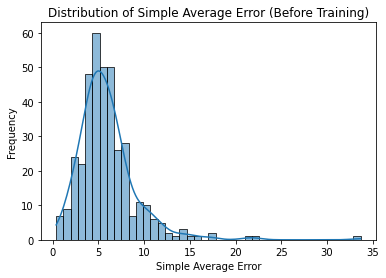

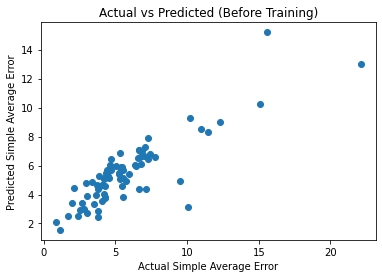

In [15]:
# Before training (raw data)
sns.histplot(y_raw, kde=True)
plt.title('Distribution of Simple Average Error (Before Training)')
plt.xlabel('Simple Average Error')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to visualize the prediction vs actual values before training
plt.scatter(y_test_raw, y_pred_raw)
plt.xlabel('Actual Simple Average Error')
plt.ylabel('Predicted Simple Average Error')
plt.title('Actual vs Predicted (Before Training)')
plt.show()

# 4.Accuracy After Using the KNN Model (With Imputation for Missing Values)

In [42]:
# Selecting features (predictors) and outcome (target variable)
X_raw = poll[[ 'Polls Analyzed', 'Predictive Plus-Minus', 'Mean-Reverted Bias', 
            'Races Called Correctly', 'Misses Outside MOE', 'Simple Expected Error', 
            'Advanced Plus-Minus', 'Bias', 'House Effect']]  # Add more predictors as needed

y_raw = poll['Simple Average Error']  # Outcome variable: 'Simple Average Error'

# Step 1: Impute missing values in the predictors using SimpleImputer (mean imputation)
#imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
#X_raw_imputed = imputer.fit_transform(X_raw)  # Apply imputation to the features
poll = poll.dropna() 

# Optionally scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw_imputed)  # Scaling the data

# Step 2: Split the cleaned and scaled data into train and test sets (80% train, 20% test)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_scaled, y_raw, test_size=0.2, random_state=42)

# Initialize the KNN model (using KNeighborsRegressor for regression)
model_clean = KNeighborsRegressor(n_neighbors=9)

# Train the model on cleaned (imputed) data
model_clean.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
y_pred_clean = model_clean.predict(X_test_clean)

# Evaluate the model
mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)

# Print the evaluation metrics
print(f'After Cleaning - Mean Squared Error: {mse_clean}')
print(f'After Cleaning - R-Squared: {r2_clean}')

After Cleaning - Mean Squared Error: 2.712425247755764
After Cleaning - R-Squared: 0.7580565161002653


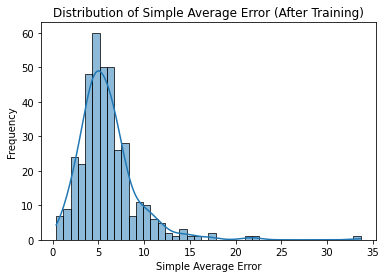

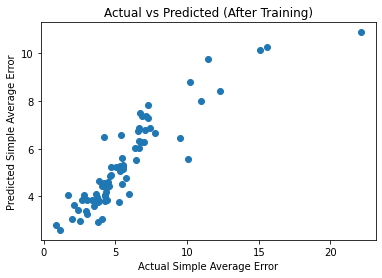

In [38]:
# After training (cleaned data)
sns.histplot(y_raw, kde=True)
plt.title('Distribution of Simple Average Error (After Training)')
plt.xlabel('Simple Average Error')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to visualize the prediction vs actual values after training
plt.scatter(y_test_clean, y_pred_clean)
plt.xlabel('Actual Simple Average Error')
plt.ylabel('Predicted Simple Average Error')
plt.title('Actual vs Predicted (After Training)')
plt.show()

In [45]:
# Compare model performance before and after cleaning
print(f'Accuracy Improvement: {r2_clean - r2_raw:.4f}')

#Expected Results
#Before Cleaning (Raw Data): The model will likely have a low R² value and a high MSE, as the KNN model won't perform well on raw data with missing values.
#After Cleaning (Imputed Data): After imputing missing values, the KNN model should show improved performance, with a higher R² and a lower MSE, indicating better predictive accuracy.

#Visual Comparison
#Before Cleaning: Expect a more scattered plot with less correlation between predicted and actual values.
#After Cleaning: Expect a more linear correlation, indicating improved model performance.

#Before training, the KNN model will likely perform poorly because it is trained on data with missing values.
#After training, once the missing values are imputed, the KNN model’s accuracy should improve significantly.

Accuracy Improvement: 0.1028


# 5.More Features

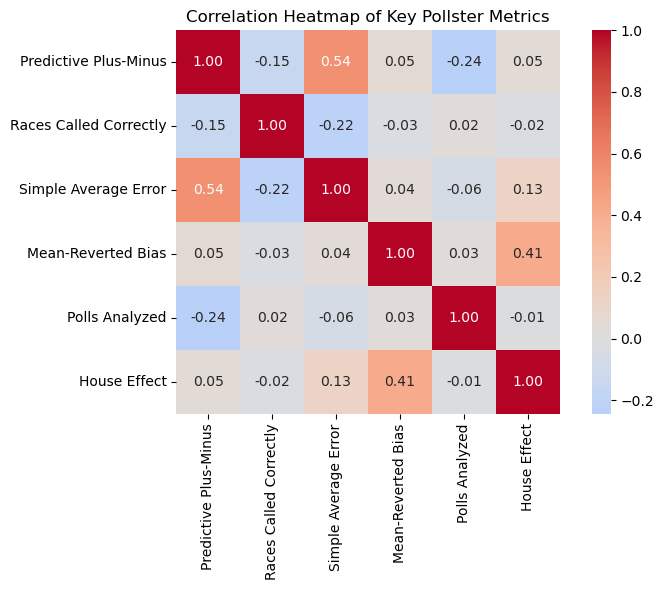

In [60]:
# Calculates the correlation between selected key pollster metrics and visualizes the results in a heatmap. 
# This helps identify relationships between important polling variables for better analysis and interpretation.

# Select key metrics for analysis - these metrics represent important performance indicators for pollsters.
key_metrics = [
    'Predictive Plus-Minus',    # Accuracy of predictions compared to actual results
    'Races Called Correctly',   # Number of races correctly predicted by the pollster
    'Simple Average Error',     # The average error between pollster predictions and actual outcomes
    'Mean-Reverted Bias',       # Bias after applying mean reversion techniques
    'Polls Analyzed',           # Number of polls conducted/analyzed by the pollster
    'House Effect'              # The bias a pollster has when reflecting political party preferences
]

# Generate the correlation matrix for the selected key metrics
# This computes the Pearson correlation coefficient between each pair of variables in 'key_metrics'
corr_matrix = poll[key_metrics].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Set figure size for better readability

# Create the heatmap using Seaborn
# annot=True: Display the correlation values inside the heatmap cells
# cmap='coolwarm': Set color scheme to show correlation magnitude, from cool (negative) to warm (positive)
# fmt='.2f': Format the correlation values to 2 decimal places
# square=True: Make the heatmap square-shaped for symmetry
# center=0: Center the color scale at 0, making it easy to distinguish positive and negative correlations
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            square=True,
            center=0)

# Add a title to the heatmap
plt.title('Correlation Heatmap of Key Pollster Metrics')

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Display the heatmap
plt.show()

In [64]:
# Calculates the distribution of values in the '538 Grade' column using value_counts()
# It prints the distribution of grades in the dataset. This helps understand the frequency of each grade 
# assigned to pollsters in the dataset and how they are distributed across different performance categories.

# Use value_counts() to count the number of occurrences of each unique grade in the '538 Grade' column
grade_dist = poll['538 Grade'].value_counts()

# Print the calculated grade distribution
print("\nGrade Distribution:")
print(grade_dist)


Grade Distribution:
538 Grade
B/C    229
A/B     61
B+      14
C/D     12
A       11
B-      11
B       10
F        9
A-       8
A+       4
C+       3
C        3
C-       1
Name: count, dtype: int64


In [66]:
# Calculates the average values of 'Predictive Plus-Minus', 'Races Called Correctly', 
# and 'Simple Average Error' for each unique grade in the '538 Grade' column, 
# then prints the rounded averages. This helps analyze the performance of pollsters based on their assigned grade.

# Group the data by the '538 Grade' column and calculate the mean for the selected metrics:
# 'Predictive Plus-Minus', 'Races Called Correctly', and 'Simple Average Error'
# The 'agg()' function allows us to apply the 'mean' function to each column of interest.
grade_metrics = poll.groupby('538 Grade').agg({
    'Predictive Plus-Minus': 'mean',  # Calculate the mean of 'Predictive Plus-Minus' for each grade
    'Races Called Correctly': 'mean', # Calculate the mean of 'Races Called Correctly' for each grade
    'Simple Average Error': 'mean'    # Calculate the mean of 'Simple Average Error' for each grade
}).round(3)  # Round the results to 3 decimal places for easier interpretation

# Print the calculated average metrics by grade
print("\nAverage Metrics by Grade:")
print(grade_metrics)


Average Metrics by Grade:
           Predictive Plus-Minus  Races Called Correctly  Simple Average Error
538 Grade                                                                     
A                         -0.732                   0.809                 5.184
A+                        -1.012                   0.763                 3.513
A-                        -0.397                   0.751                 4.878
A/B                       -0.273                   0.864                 4.081
B                          0.121                   0.751                 5.506
B+                        -0.182                   0.797                 4.870
B-                         0.441                   0.812                 5.516
B/C                        0.600                   0.776                 6.297
C                          1.056                   0.789                 6.671
C+                         0.764                   0.800                 7.859
C-                       

In [24]:
sortedgrades= poll.sort_values(by='538 Grade')
print('Sorted by 538 Grade:')
sortedgrades

Sorted by 538 Grade:


,Rank,Pollster,Pollster Rating ID,Polls Analyzed,NCPP/AAPOR/Roper,Banned by 538,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty
494,495,Monmouth University,215,120,1,0,-0.707624,A,2.087708,0.783333,...,5.895936,6.281559,-0.380769,-1.036982,-0.864348,83,2.741046,-0.117476,4.889777,0.271113
495,496,Marist College,183,189,1,0,-0.669456,A,0.106988,0.833333,...,5.503499,6.156419,-0.648065,-0.727298,-0.637006,121,0.131436,0.029686,4.997717,0.021916
496,497,Fox News/Beacon Research/Shaw & Co. Research,103,46,1,0,-0.652683,A,1.807602,0.750000,...,5.562536,5.996277,-0.428886,-0.769743,-0.515021,31,3.073490,0.866346,4.616863,0.000000
14,15,Fox News/Beacon Research/Shaw & Co. Research,103,46,1,0,-0.652683,A,1.807602,0.750000,...,5.562536,5.996277,-0.428886,-0.769743,-0.515021,31,3.073490,0.866346,4.616863,0.000000
13,14,Marist College,183,189,1,0,-0.669456,A,0.106988,0.833333,...,5.503499,6.156419,-0.648065,-0.727298,-0.637006,121,0.131436,0.029686,4.997717,0.021916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,247,KG Polling,502,2,0,1,0.562958,F,0.190259,1.000000,...,2.170063,5.563354,-3.388437,-1.625744,-0.142536,2,2.170063,0.500000,1.000000,1.574900
221,222,Blumenthal Research Daily,447,2,0,1,0.526374,F,-0.157599,1.000000,...,2.467611,5.638341,-3.165875,-2.051734,-0.179885,2,-1.797548,-3.291667,1.000000,1.583625
24,25,Strategic Vision LLC,320,133,0,1,-0.409343,F,-1.565350,0.887218,...,3.919699,5.182542,-1.257989,-0.775949,-0.566836,110,-2.314231,-2.151474,4.352002,0.118201
58,59,Pharos Research Group,254,33,0,1,-0.181091,F,0.783768,0.939394,...,3.727244,4.996001,-1.263903,-0.842374,-0.426572,33,1.547750,0.880558,4.020183,0.227428


In [27]:
selecteddataloc= poll.loc[0:6, ['Pollster', 'Polls Analyzed','Bias']]
selecteddataloc

,Pollster,Polls Analyzed,Bias
0,Selzer & Co.,50,0.201305
1,ABC News/The Washington Post,82,1.256719
2,Siena College/The New York Times Upshot,83,1.422586
3,IBD/TIPP,31,-1.587916
4,Field Research Corp. (Field Poll),25,-2.455076
5,SurveyUSA,834,0.051270
6,Marquette University Law School,13,1.407818


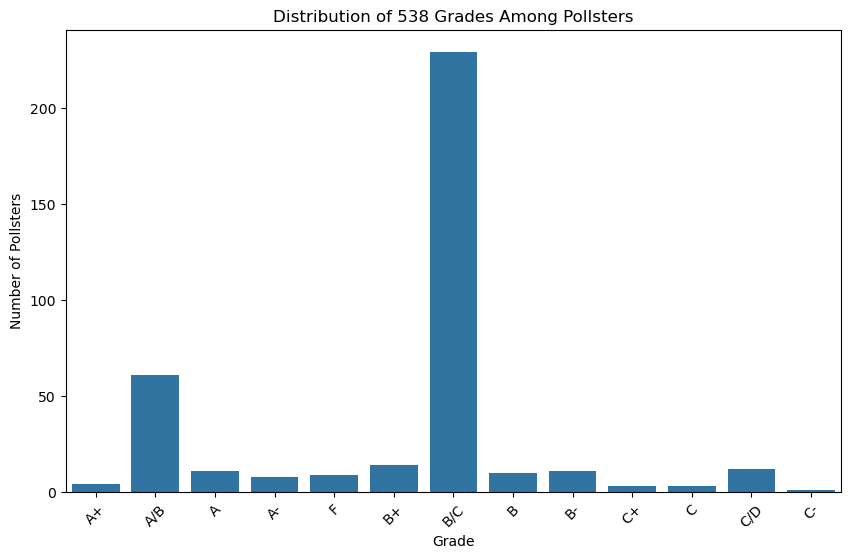

In [68]:
# Creates a countplot to visualize the distribution of '538 Grade' across pollsters.
# It shows how many pollsters belong to each grade, providing insights into the grading distribution 
# and the overall performance spread of pollsters.

# Set the figure size to ensure the plot is large enough for better readability
plt.figure(figsize=(10, 6))

# Create a countplot using Seaborn to visualize the frequency of each '538 Grade' value across pollsters.
# The 'x' axis represents the '538 Grade' column, and the y-axis shows the number of pollsters in each grade.
sns.countplot(data=poll, x='538 Grade')

# Set the title of the plot to indicate that it shows the distribution of grades among pollsters
plt.title('Distribution of 538 Grades Among Pollsters')

# Label the x-axis as 'Grade' to clarify what the x-axis represents
plt.xlabel('Grade')

# Label the y-axis as 'Number of Pollsters' to indicate the number of pollsters in each grade
plt.ylabel('Number of Pollsters')

# Rotate the x-axis labels to avoid overlap and ensure they are readable
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [70]:
# Identifies and displays the top 10 pollsters based on their 'Predictive Plus-Minus' values.
# It shows the Pollster name, their Predictive Plus-Minus score, and their 538 Grade,
# helping to highlight the most accurate pollsters according to this metric.

# Use 'nlargest' to select the top 10 pollsters based on 'Predictive Plus-Minus' values.
# The 'nlargest' function returns the top 10 rows sorted in descending order by the specified column.
top_10 = poll.nlargest(10, 'Predictive Plus-Minus')[['Pollster', 'Predictive Plus-Minus', '538 Grade']]

# Display the top 10 pollsters along with their Predictive Plus-Minus score and 538 Grade
print("\nTop 10 Pollsters by Predictive Plus-Minus:")
print(top_10)


Top 10 Pollsters by Predictive Plus-Minus:
                        Pollster  Predictive Plus-Minus 538 Grade
492   Fort Hays State University               2.925767       C/D
490     Nielson Brothers Polling               2.217821       C/D
488           Humphrey Institute               1.941500       C/D
487                 TCJ Research               1.732523         F
486                 FM3 Research               1.729452       C/D
485  Opinion Research Associates               1.653558       C/D
482      McLaughlin & Associates               1.556690       C/D
481             Brown University               1.511510       C/D
479               Target Insyght               1.442224       C/D
478         Saint Leo University               1.426303       C/D


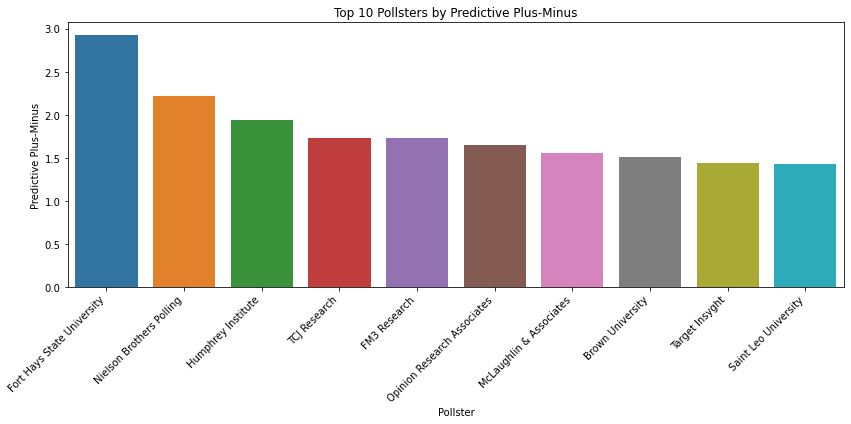

In [37]:
# Creates a bar plot to visualize the top 10 pollsters ranked by their Predictive Plus-Minus score.
# This highlights the performance of the most accurate pollsters, making it easy to compare their scores visually.

# Selects the top 10 pollsters with the highest 'Predictive Plus-Minus' scores
top_10_pollsters = poll.nlargest(10, 'Predictive Plus-Minus')

# Set up the figure size for the plot to ensure it is large enough for better readability
plt.figure(figsize=(12, 6))

# Creates a bar plot using Seaborn, plotting 'Pollster' on the x-axis and 'Predictive Plus-Minus' on the y-axis
# This visually ranks the pollsters by their Predictive Plus-Minus score
sns.barplot(data=top_10_pollsters, x='Pollster', y='Predictive Plus-Minus')

# Set the title of the plot to indicate it shows the top 10 pollsters based on their Predictive Plus-Minus score
plt.title('Top 10 Pollsters by Predictive Plus-Minus')

# Rotate the x-axis labels to prevent overlap and ensure they are readable
plt.xticks(rotation=45, ha='right')

# Tighten the layout to prevent clipping of labels and ensure everything fits properly
plt.tight_layout()

# Display the plot
plt.show()

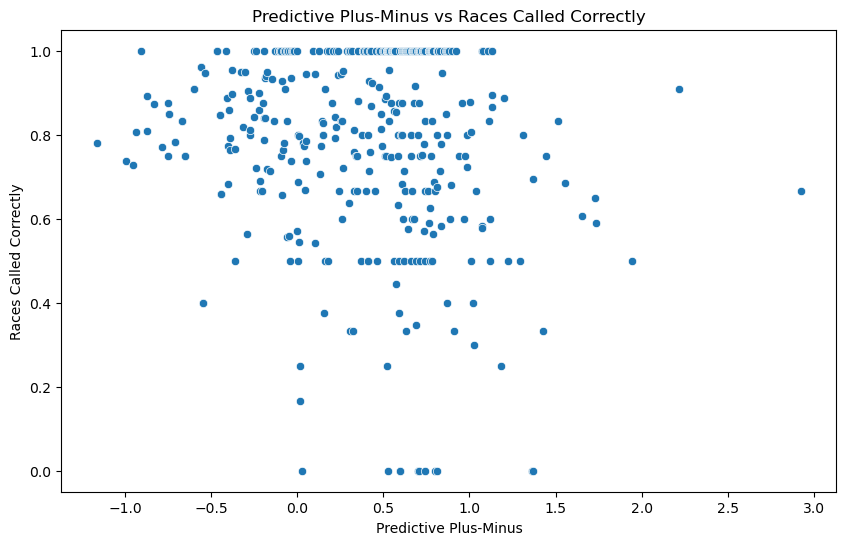

In [72]:
# Generates a scatter plot to visualize the relationship between 'Predictive Plus-Minus' and 'Races Called Correctly'
# This helps identify whether there is a correlation between the accuracy of predictions (Predictive Plus-Minus) 
# and the number of races correctly predicted (Races Called Correctly).

# Set up the figure size for the plot to ensure it's large enough for better readability
plt.figure(figsize=(10, 6))

# Create a scatter plot using Seaborn to plot 'Predictive Plus-Minus' on the x-axis and 'Races Called Correctly' on the y-axis
# This will show the distribution and possible correlation between these two variables
sns.scatterplot(data=poll, x='Predictive Plus-Minus', y='Races Called Correctly')

# Set the title for the plot to describe the relationship being shown
plt.title('Predictive Plus-Minus vs Races Called Correctly')

# Label the x-axis to indicate what the values on this axis represent
plt.xlabel('Predictive Plus-Minus')

# Label the y-axis to indicate what the values on this axis represent
plt.ylabel('Races Called Correctly')

# Display the plot to the screen
plt.show()